In [ ]:
#ADITYA SINGH GANGWAR
#2021CSM1001

# Assignment 7 : Hand-written Digit Classification using Deep Learning

---


Total Points: **100**

Tentative Weightage : **20%**

Submission Deadline : **24th November 2021, 11:00 AM**

---



General Instructions:

---


1. You have to do this lab individually.
2. Along with **tensorflow** and **keras**, you may use **seaborn, matplotlib, pandas, numpy, sklearn, scikit-learn libraries**
3. All the code should be submitted in the form of a single colab notebook.
4. Points for each sub-section are mentioned in the appropriate question.
5. You can use Google colab to run a jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) (https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/). 
6. The assignment must be submitted on Google classroom. The code as well as the accompanying observations should be made part of the notebook.
7. **Code Readability** is very important. Modularize your code by making use of classes, functions that can be flexibly reused wherever necessary. Also use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as necessary.
8. You are expected to write your **observations** (preferably in a text block) and not just an error free code.
9. You are expected to follow the **honor code** of the class.
10. The deadline is strict and any assignment submitted later will not
be considered for evaluation.
11. The marks will be awarded on the basis of quality of code, use of innovative data structures, scalability, correctness, and observations made.
12. You can add as many code or text cells in this notebook.
13. You will have to mount your drive and change the paths according to your implementation. 

#Dataset

###About the Dataset


The MNIST dataset is stands for the "Modified National Institute of Standards and Technology" dataset. <br> It consists of 70,000 square grayscale images of size 28x28 pixels. The images are of handwritten single digits<br> between 0 and 9 i.e. 10 classes are present.

**This dataset comes bundled with the Keras lib. You have to use mnist dataset available in keras.datasets**

#**Section 1: (10 points)** 

1. Load dataset (1 point)

2. The MNIST dataset provide a split of Train and Test. Display total number of train and test samples in dataset (1 point).

3. print number of classes in dataset (2 points).

4. show 9 samples (images) of from train data in a matplot grid of 3x3 (3 points).

5. Plot a bar graph showing number of samples of each class in train dataset (3 points)

In [ ]:
#Imports you may need, you can add or remove according to your need

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
#just use below given line to import the dataset from keras 
from keras.datasets import mnist



In [ ]:
#you need to load dataset 
(x_train, y_train), (x_test, y_test) =mnist.load_data()


In [ ]:
#print number of samples in train and test 
print("Number of samples in train:", len(x_train)) 
print("Number of samples in test:", len(x_test))


Number of samples in train: 60000
Number of samples in test: 10000


In [ ]:
#print number of clases in dataset
print(np.unique(y_train))
print("Number of classes in dataset: ",len(np.unique(y_train)))

[0 1 2 3 4 5 6 7 8 9]
Number of classes in dataset:  10


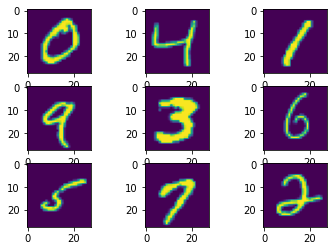

In [ ]:
#show 9 sample(image) of from train data

_, axis = plt.subplots(3,3)
axis[0,0].imshow(x_train[1])
axis[0,1].imshow(x_train[2])
axis[0,2].imshow(x_train[3])
axis[1,0].imshow(x_train[4])
axis[1,1].imshow(x_train[27])
axis[1,2].imshow(x_train[18])
axis[2,0].imshow(x_train[11])
axis[2,1].imshow(x_train[15])
axis[2,2].imshow(x_train[16])


[[   0 5923]
 [   1 6742]
 [   2 5958]
 [   3 6131]
 [   4 5842]
 [   5 5421]
 [   6 5918]
 [   7 6265]
 [   8 5851]
 [   9 5949]]


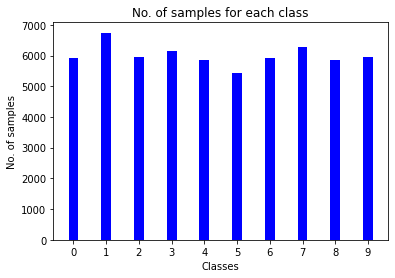

In [ ]:
clas, number = np.unique(y_train, return_counts=True)

distribution = np.column_stack((clas, number)) 
print (distribution)
plt.bar(clas, number, color ='blue', width = 0.3)
plt.xticks(clas)
plt.xlabel("Classes")
plt.ylabel("No. of samples")
plt.title("No. of samples for each class")
plt.show()

#**Section 2: Preprocessing (20 points)**

1. Reshape train and test images into (number of samples, 28, 28, 1) (5 points)

2. Normalization: It is used to change the values of numeric columns in the dataset to have a common scale (5 points).

3. One hot encoding: It is a type of representation used in multi class classification. Here each bit represents a possible category. Apply One hot encoding on Y_train and Y_test. (5 points)

4. Split train data into train and validation data in ratio 80:20 and print count in train and validation data (5 points). You may want to read about the validation set and its uses.

In [ ]:
#Reshape
x_train=x_train.reshape(len(x_train),28,28,1)
x_test=x_test.reshape(len(x_test),28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
#Normalize
x_train=x_train.astype(np.float32)/255
x_test=x_test.astype(np.float32)/255


Divide x_train and x_test by 255 so we get pixel values from 0 to 1

In [ ]:
#Perform One hot encoding
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Using one hot encoding we can convert each y_train and y_test sample into a 10 element array where index of each sample will be its class value and rest all indexes will be 0. Index at which there is 1 will be only activated.

In [ ]:
#You need to split data in train and validation data in 80:20

x_train, x_vali, y_train, y_vali = train_test_split(x_train, y_train, test_size= 0.2, random_state= 27)
print(x_train.shape)
print(x_vali.shape)
print(y_train.shape)
print(y_vali.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(48000, 10)
(12000, 10)


We split the train data into train and validation data in the ratio of 80:20. This validation data is used to show how much our model is getting predictions correct with the unseen data.

#**Section 3: Model (10 points)**

Create a sequential model as per the following specifications (2 points per question):<br><br> 
1. Add a Conv2D layer with 32 kernels, 3x3 filter, and relu activation
1. Add a MaxPooling layer
1. Add a Flatten layer
1. Add a dense layer with 128 units and relu activation
1. Add a dense layer with 10 units annd softmax activation


In [ ]:
def MyModel():
	model = Sequential()
 	#Create the model here
	model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
	model.add(MaxPooling2D((2,2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(10, activation='softmax'))
 
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

We use sequential model where we place each layer one after another where input will flow from first layer to last layer sequentially.

Since it is multiclass classification problem where output can be from 0 to 9, we have used softmax activation function.

We have also used flatten function to convert multi-dimensional input tensors into a single dimension.

In [ ]:
#call the above given function and print model summary

mymodel=MyModel()
mymodel.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 5408)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               692352    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

Total parameters are 693,962 that will be learnt by our model.

#**Section 5: Model Training (20 points)**

1. You need to fit the above created model with 10 epochs, batch_size as 32, and verbose as 1 (10 points).

2. Plot a graph showing validation accuracy of the model during training. (5 points).

3. Plot a graph showing validation loss of the model during training. (5 point)

In [ ]:
#fit the above created model and plot the graphs
mymodel_train=mymodel.fit(x_train,y_train,epochs=10,batch_size=32,verbose=1,validation_data=(x_vali, y_vali))

Epoch 1/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.1720 - accuracy: 0.9485 - val_loss: 0.0788 - val_accuracy: 0.9769
Epoch 2/10
1500/1500 [==============================] - 32s 22ms/step - loss: 0.0582 - accuracy: 0.9821 - val_loss: 0.0675 - val_accuracy: 0.9810
Epoch 3/10
1500/1500 [==============================] - 32s 22ms/step - loss: 0.0364 - accuracy: 0.9889 - val_loss: 0.0660 - val_accuracy: 0.9801
Epoch 4/10
1500/1500 [==============================] - 32s 22ms/step - loss: 0.0253 - accuracy: 0.9921 - val_loss: 0.0609 - val_accuracy: 0.9823
Epoch 5/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0174 - accuracy: 0.9947 - val_loss: 0.0631 - val_accuracy: 0.9839
Epoch 6/10
1500/1500 [==============================] - 32s 22ms/step - loss: 0.0125 - accuracy: 0.9958 - val_loss: 0.0743 - val_accuracy: 0.9806
Epoch 7/10
1500/1500 [==============================] - 32s 22ms/step - loss: 0.0097 - accuracy: 0.9968 - val_loss: 0.0629 -

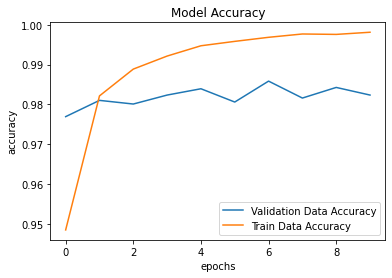

In [ ]:
plt.plot(mymodel_train.history['val_accuracy'],label='Validation Data Accuracy')
plt.plot(mymodel_train.history['accuracy'],label='Train Data Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.show()





*   For each epoch we are getting increased accuracy in train dataset. 
*   In validation dataset our accuracy is not as high as accuracy in train dataset.

*   Accuracy in train data = 0.9981
*   Accuracy in validation data = 0.9823

*   So this model gives high accuracy on seen data but not so high accuracy on unseen data.
*   There is a high variance between accuracy in Train data and Validation data.

*   We will reduce this variance in our improved model.










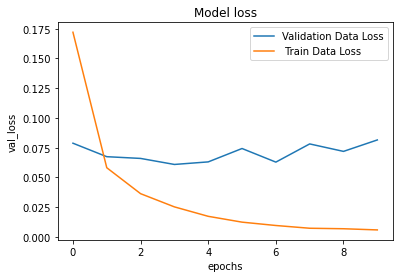

In [ ]:
plt.plot(mymodel_train.history['val_loss'],label='Validation Data Loss')
plt.plot(mymodel_train.history['loss'],label=' Train Data Loss')
plt.xlabel('epochs')
plt.ylabel('val_loss')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.show()



*  For each epoch we are getting decreased loss in train dataset.
*  Loss in validation dataset is as not low as loss in train dataset.

*   Loss in Train dataset = 0.0060
*   Loss in Validation dataset = 0.0815

*   So this model gives almost 0 loss on seen data but gives a little high loss on unseen data.
*   So, there is a high variance between loss in Train data and Validation data.


*   We will reduce this variance in our improved model.











# **Section 6: Model Improvement (20 points)**

Improve the CNN model by adding built earlier by adding (6 points)
1. Add 2 more Conv2D layers after the first MaxPooling layer with 64 kernels in each new layer and 3x3 filter with relu activation
1. Add another MaxPooling2D layer
1. Add a "Dropout" layer with parameter 0.2

Rest layers remains the same as the previous model.

1. Fit the above created improved model with 10 epochs, batch_size as 32, and verbose as 1 (10 points).

2. Plot a graph showing validation accuracy of the model during training. (2 points).

3. Plot a graph showing validation loss of the model during training. (2 point)





In [ ]:
def Improved_Model():
	model = Sequential()
	#create the improved model
	model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
	model.add(MaxPooling2D((2,2)))
	model.add(Conv2D(64,(3,3),activation='relu'))
	model.add(Conv2D(64,(3,3),activation='relu'))
	model.add(MaxPooling2D((2,2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))
 
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

We add dropout layer to reduce high variance that we saw in our last model.

Dropout layer will remove some of the neurons with a probability of 0.2 from each layer. It will help to spread the weight over all the neurons.

In [ ]:
#call the above given function for improved model and print model summary
imp_model=Improved_Model()
imp_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 1024)             

In [ ]:
#fit the model and show plots
impmodel_train=imp_model.fit(x_train,y_train,epochs=10,batch_size=32,verbose=1,validation_data=(x_vali, y_vali))

Epoch 1/10
1500/1500 [==============================] - 73s 48ms/step - loss: 0.1589 - accuracy: 0.9509 - val_loss: 0.0590 - val_accuracy: 0.9816
Epoch 2/10
1500/1500 [==============================] - 71s 48ms/step - loss: 0.0550 - accuracy: 0.9830 - val_loss: 0.0519 - val_accuracy: 0.9832
Epoch 3/10
1500/1500 [==============================] - 72s 48ms/step - loss: 0.0383 - accuracy: 0.9875 - val_loss: 0.0432 - val_accuracy: 0.9877
Epoch 4/10
1500/1500 [==============================] - 72s 48ms/step - loss: 0.0296 - accuracy: 0.9905 - val_loss: 0.0347 - val_accuracy: 0.9897
Epoch 5/10
1500/1500 [==============================] - 72s 48ms/step - loss: 0.0238 - accuracy: 0.9929 - val_loss: 0.0337 - val_accuracy: 0.9904
Epoch 6/10
1500/1500 [==============================] - 71s 48ms/step - loss: 0.0188 - accuracy: 0.9938 - val_loss: 0.0329 - val_accuracy: 0.9918
Epoch 7/10
1500/1500 [==============================] - 71s 47ms/step - loss: 0.0168 - accuracy: 0.9941 - val_loss: 0.0343 -

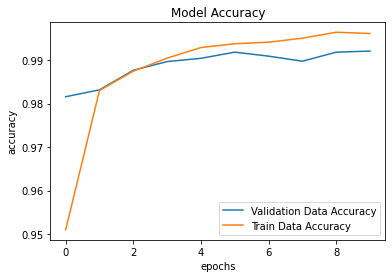

In [ ]:
plt.plot(impmodel_train.history['val_accuracy'],label='Validation Data Accuracy')
plt.plot(impmodel_train.history['accuracy'],label='Train Data Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.show()




*   For each epoch there is increase in accuracy in train dataset.




*   Accuracy of train dataset is = 0.9961
*   Accuracy of validation dataset = 0.9921

*   So in our improved model we get almost same Accuracy of Train dataset and Validation dataset.
*   So there is very less variance in improved model as comparison to our previous model because of dropout layer.





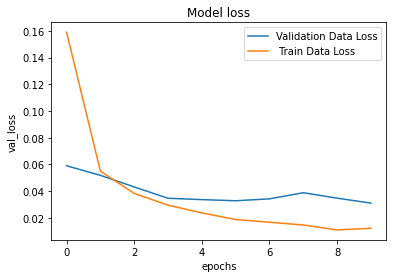

In [ ]:
plt.plot(impmodel_train.history['val_loss'],label='Validation Data Loss')
plt.plot(impmodel_train.history['loss'],label=' Train Data Loss')
plt.xlabel('epochs')
plt.ylabel('val_loss')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.show()




*   For each epoch there is decrease in loss in train dataset.


*   Loss of train dataset = 0.0123
*   Loss of validation dataset = 0.0311

*   So in our improved model we get almost same loss on seen data and unseen data.
*   Variance in loss is very less in improved model as comparison to our previous model.





#**Section 6: Model Evaluation (20 points)**

You need to evaluate the performance of both the models on test data and print accuracy and loss (5 points). Further, comment on the performance of each model.

In [ ]:
#Your code and comments here
loss,accuracy=mymodel.evaluate(x_test,y_test,verbose=1)


313/313 [==============================] - 3s 8ms/step - loss: 0.0813 - accuracy: 0.9815


**OBSERVATIONS FOR FIRST MODEL:**

**Accuracy of our first model on the testing data is 0.9815 and on the training data accuracy was 0.9981**

**So our first model gives a good accuracy on the unseen/testing data also.**

**Loss on testing data is 0.0813 and loss on training data was 0.0060**

**So it also gives a considerably less loss on the testing/unseen data.**  

In [ ]:
imp_loss,imp_accuracy=imp_model.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 5s 15ms/step - loss: 0.0310 - accuracy: 0.9920


**OBSERVATIONS FOR IMPROVED MODEL:**

**Accuracy of our improved model on testing data is 0.9920 and on training data it was 0.9961.**

**So both the accuracies on training as well as testing data are very similar. This shows that our improved model works equally good on both testing and training data.**

**Loss of our improved model on testing data is 0.0310 and loss on training data was 0.0123**

**So loss on both training and testing data is also very similar. This also shows that our improved model works equally good on both testing and training data.**

**CONCLUSIONS:**

**Improved model gives higher accurace and lower loss value than our first model.**

**Improved model gives less variance for loss and accuracy on training and vaildation data as comparison to our first model with the help of dropout layer.**

**Improved model performs better on unseen data than first model.**